
\begin{gather*}
{\displaystyle Logistic\ Regression}\\
\\
{\displaystyle --\ Giả\ sử\ xác\ suất\ một\ tập\ hợp\ features\ thuộc\ vào\ phân\ lớp\ 1,\ gọi\ là\ p}\\
{\displaystyle P( y\ =\ 1\ |\ w,\ x) \ =\ p\ \ \ \ \ \ \ \ }\\
{\displaystyle P( y\ =\ 0\ |\ w,\ x) \ =\ 1\ -\ p}\\
P( y\ |\ p) \ =\ p^{y} \ *\ ( 1-p)^{1-y} \ \ \\
( Phân\ phối\ Bernoulli)\\
\\
\rightarrow \ Xác\ suất\ tổng\ quát\ trên\ một\ tập\ dữ\ liệu\ là:\\
P( y\ |\ p) \ =\ \coprod _{i=1}^{n} p_{i} \ ^{y_{i}} \ *\ ( 1-p_{i})^{1-y_{i}}\\
\\
\rightarrow \ Mục\ tiêu\ là\ tìm\ w\ sao\ cho\ xác\ suất\ trên\ đạt\ maximum\ hay\ hàm\ số\ sau\ đạt\ cực\ tiểu:\\
Loss( p,\ y) \ =\ -log\ ( P( y\ |\ p)) \ =\ -\sum _{i=1}^{n} y_{i} \ *\ log( p_{i}) \ +\ ( 1-y_{i}) \ *\ log( 1\ -\ p_{i})\\
\\
\\
Optimizer:\ Using\ Stochastic\ Gradient\ Descent\\
\\
\frac{\partial Loss_{i}}{\partial w} =-\frac{y_{i}}{p_{i}} \ *\ \frac{\partial p_{i}}{\partial w} \ \ +\frac{1-y_{i}}{1-p_{i}} \ *\ \frac{\partial p_{i}}{\partial w} \ \ =\frac{\partial p_{i}}{\partial w} \ *\ \left(\frac{1-y_{i}}{1-p_{i}} -\frac{y_{i}}{p_{i}}\right) =\frac{\partial p_{i}}{\partial w} \ *\ \frac{p_{i} -y_{i}}{p_{i} \ *\ ( 1-p_{i})} \ ( *)\\
\\
\Longrightarrow \ Giả\ sử\ p_{i} =f\left( w^{T} x\right)\\
Đặt\ s=w^{T} x\ \Longrightarrow \ p_{i} \ =\ f( s)\\
\\
\frac{\partial p_{i}}{\partial w} =\frac{\partial p_{i}}{\partial s} \ *\ \frac{\partial s}{\partial w} =\frac{\partial p_{i}}{\partial s} \ *\ x\\
\\
\Longrightarrow \ \ tìm\ \frac{\partial p_{i}}{\partial s} \ mà\ khi\ đạo\ hàm\ triệt\ tiêu\ đi\ p_{i} \ *\ ( 1-p_{i}) \ trong\ phương\ trình\ ( *) \ \Longrightarrow f\ là\ hàm\ Sigmoid\ \\
\\
f( x) =\frac{1}{1+e^{-x}} =\sigma ( x)\\
\\
\Longrightarrow \ ( *) \ =\ ( p_{i} \ -\ y_{i}) \ *\ x_{i}\\
\\
w\ =\ w\ -\ \eta \ *\ ( p_{i} \ -\ y_{i}) \ *\ x_{i} \\
\end{gather*}

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

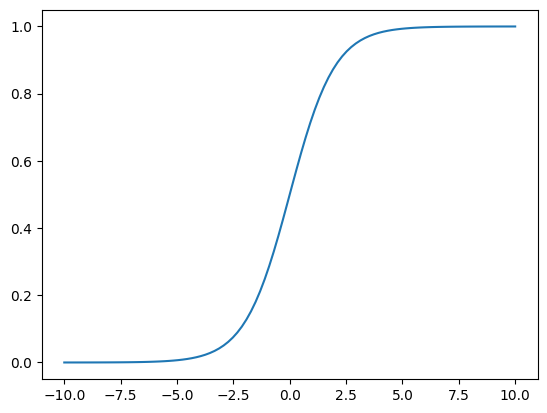

In [2]:
# sigmoid function
x = np.linspace(-10, 10, 100)
y = np.array([1 / (1 + np.exp(-_x)) for _x in x])
plt.plot(x, y);

In [3]:
cnt_points = 10

X_class_zero = 4 * np.random.rand(cnt_points, 1)
X_class_one = 2 + 4 * np.random.rand(cnt_points, 1)

X_train = np.concatenate((np.ones((2 * cnt_points, 1)), np.concatenate((X_class_zero, X_class_one), axis=0)), axis=1).reshape(2 * cnt_points, 2, 1)
y_train = np.concatenate((np.zeros((1, cnt_points), dtype="uint8"), np.ones((1, cnt_points), dtype="uint8")), axis=1).reshape((-1, 1))

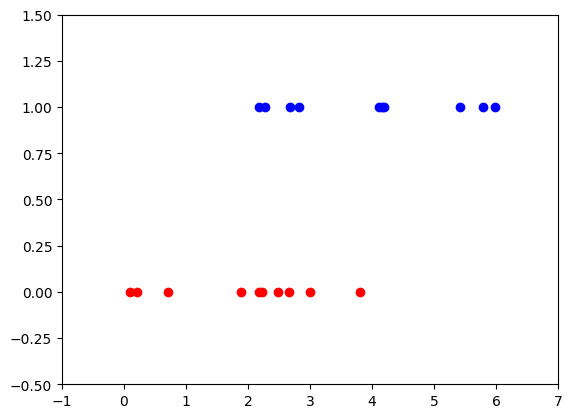

In [4]:
plt.scatter(X_train[:cnt_points, 1, 0], y_train[:cnt_points], c="r",)
plt.scatter(X_train[cnt_points:, 1, 0], y_train[cnt_points:], c="b")
plt.axis([-1, 7, -0.5, 1.5]);

In [5]:
# Logistic Regression

def sigmoid(v):
    return 1 / (1 + np.exp(-v))

# vector cot
w = np.array([10., 10.]).reshape(-1, 1)
esp = 1e-4
weights = []
step_diff = 20
count = 0

for _ in range(10000):
    i = np.random.randint(X_train.shape[0])
    w = w - (sigmoid(w.T @ X_train[i]) - y_train[i]) * X_train[i]
    weights.append(w)
    count += 1
    
    if count % step_diff == 0:
        if np.linalg.norm(w - weights[-step_diff]) <= esp:
            break
            
print(w)

[[-14.83626578]
 [  4.08265786]]


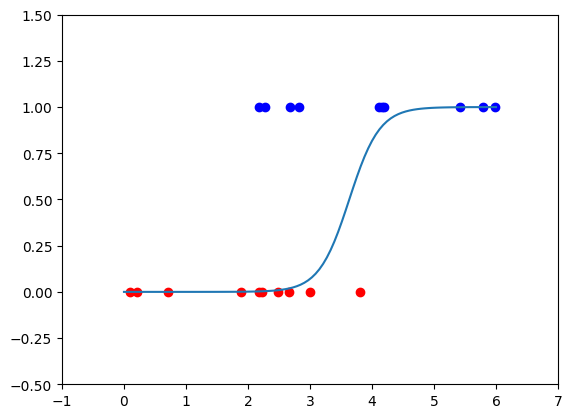

In [6]:
plt.scatter(X_train[:cnt_points, 1, 0], y_train[:cnt_points], c="r",)
plt.scatter(X_train[cnt_points:, 1, 0], y_train[cnt_points:], c="b")
plt.axis([-1, 7, -0.5, 1.5]);

x = np.concatenate((np.ones((100, 1)), np.linspace(0, 6, 100).reshape(-1, 1)), axis=1).reshape(100, -1, 1)
y = np.array([sigmoid(w.T @ x[i]) for i in range(x.shape[0])])

# y -> predicted values:
    # if larger than threshold (0.5) -> class 1
    # else -> class 0

plt.plot(x[:, 1, 0], y[:, :, 0]);

# Practice

In [345]:
# Kaggle Dataset: https://www.kaggle.com/datasets/dragonheir/logistic-regression

df = pd.read_csv("data.csv")
df = df.drop(["User ID"], axis=1)
df["Gender"] = df["Gender"].replace(["Male", "Female"], [0, 1])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


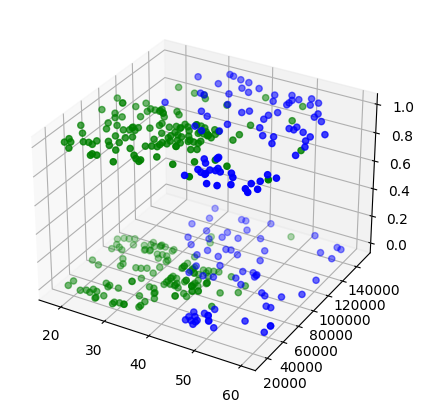

In [331]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection="3d")

buy = df[df["Purchased"] == 1]
no_buy = df[df["Purchased"] == 0]

ax.scatter3D(buy["Age"], buy["EstimatedSalary"], buy["Gender"], c="b")
ax.scatter3D(no_buy["Age"], no_buy["EstimatedSalary"], no_buy["Gender"], c="g");

In [332]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score

In [344]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
X = X.astype(float)

In [337]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

# Scale, khắc phục các vấn đề về hàm sigmoid (nếu số quá lớn -> sigmoid luôn là 1)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Add columns "1"
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1).reshape(-1, X.shape[1] + 1, 1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1).reshape(-1, X.shape[1] + 1, 1)

In [342]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

print(accuracy_score(y_test, y_pred))
print(y_pred)

0.825
[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0]


In [348]:
# Logistic Regression

w = np.random.rand(X_train.shape[1], 1)
w_last = w
N = X_train.shape[0]
count = 0
step_diff = 20
esp = 1e-4
lr = .01

while count <= 1e5:
    t = np.random.permutation(N)
    for i in t:
        w = w - lr * (sigmoid(w.T @ X_train[i]) - y_train[i]) * X_train[i]
        count += 1

        if count % step_diff == 0:
            if np.linalg.norm(w - w_last) <= esp:
                print(it)
                break

            w_last = w
            
y_pred = np.array([1 if sigmoid(w.T @ _x) >= 0.5 else 0 for _x in X_test]).flatten()
print(y_pred)
print(accuracy_score(y_test, y_pred))

[0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0]
0.8666666666666667
